# Usage of BiasBase class
### a) Relaxed scans along any CV
### b) Umbrella sampling 

To analyse the umbrella sampling results, please install [adaptive-sampling](https://github.com/ochsenfeld-lab/adaptive_sampling) package:
```bash
pip install git+https://github.com/ochsenfeld-lab/adaptive_sampling@bff1ef1
```

Note: this notebook relies on an old and unstable version of the adaptive-sampling package.

### Imports

In [ ]:
import os

import matplotlib.pyplot as plt
import nglview as nv
import numpy as np
from adaptive_sampling.processing_tools import mbar
from ase import units
from ase.io import read
from ase.optimize import BFGS
from tqdm import tqdm

from nff.io.ase import AtomsBatch
from nff.io.bias_calculators import BiasBase
from nff.md.colvars import ColVar
from nff.md.nvt import Langevin
from nff.md.utils import BiasedNeuralMDLogger

plt.style.use("default")

### Load the starting structure

In [2]:
start_geom = read("models/ammonia/Ammonia.xyz")

In [3]:
# central dictionary for the ColVar class
# in this tutorial we will use the improper dihedral of ammonia
info_dict = {
    "name": "dihedral",
    "index_list": [0, 1, 2, 3],
}

atoms = AtomsBatch.from_atoms(start_geom)

# use the distance of the scan for center of umbrella window
CV = ColVar(info_dict)
cv, cv_grad = CV(atoms)

print(f"Start value: {cv*180/np.pi} degrees = {cv} radians")

Start value: 42.17880578196517 degrees = 0.7361590354545137 radians


### The scan

In [4]:
# the cv in radians -1 to 1 is a decent choice
min_val = -1.0
max_val = 1.0
dval = 0.05  # step between minimizations
targets = np.arange(min_val, max_val + dval, dval)

In [5]:
device = "cpu"

opt_traj = []
opt_eners = []

for target in tqdm(targets):
    # this is a list for the class to enable multidimensional PMFs
    # definition is the CV definition
    # as we do a minimization, there is no CV range, we want to set a minimum value
    # ext_k is the force constant in eV/(CV-unit)**2
    cv_defs = [
        {
            "definition": info_dict,
            "range": [target, target],
            "ext_k": 100.0,
            "type": "angle",
        }
    ]

    # set the calculator, which is the BiasBase class
    calculator = BiasBase.from_file("models/ammonia/", cv_defs=cv_defs, directed=True, device=device)
    atoms.set_calculator(calculator)

    dyn = BFGS(atoms)

    dyn.run(fmax=0.005, steps=1000)

    opt_traj.append(atoms.copy())
    opt_eners.append(atoms.get_potential_energy())

opt_eners = np.array(opt_eners)

  0%|          | 0/41 [00:00<?, ?it/s]

      Step     Time          Energy         fmax
BFGS:    0 13:51:04      150.717314      273.9187
BFGS:    1 13:51:04       87.837524      176.1401
BFGS:    2 13:51:04       44.639209      151.9846
BFGS:    3 13:51:04       12.248152       83.2718
BFGS:    4 13:51:04        0.569411       10.1930
BFGS:    5 13:51:04        0.258650        4.3837
BFGS:    6 13:51:04        0.196830        0.9218
BFGS:    7 13:51:04        0.188902        0.5390
BFGS:    8 13:51:04        0.187678        0.4763
BFGS:    9 13:51:04        0.184096        0.4392
BFGS:   10 13:51:04        0.182494        0.3853
BFGS:   11 13:51:04        0.179842        0.1597
BFGS:   12 13:51:04        0.179246        0.0618
BFGS:   13 13:51:04        0.179134        0.0171
BFGS:   14 13:51:04        0.179132        0.0039


  2%|▏         | 1/41 [00:00<00:16,  2.47it/s]

      Step     Time          Energy         fmax
BFGS:    0 13:51:04        0.236639        7.9456
BFGS:    1 13:51:04        3.132437       40.8906
BFGS:    2 13:51:04        0.133999        1.8371
BFGS:    3 13:51:04        0.120064        1.0631
BFGS:    4 13:51:04        0.117955        0.1043
BFGS:    5 13:51:04        0.117876        0.0409
BFGS:    6 13:51:04        0.117795        0.0296
BFGS:    7 13:51:04        0.117769        0.0291
BFGS:    8 13:51:04        0.117760        0.0090
BFGS:    9 13:51:04        0.117759        0.0022
      Step     Time          Energy         fmax
BFGS:    0 13:51:04        0.187839        7.8743
BFGS:    1 13:51:04        2.906062       39.5176
BFGS:    2 13:51:04        0.083307        1.6682
BFGS:    3 13:51:04        0.071290        0.9027
BFGS:    4 13:51:04        0.069771        0.0995
BFGS:    5 13:51:04        0.069686        0.0375
BFGS:    6 13:51:04        0.069574        0.0450
BFGS:    7 13:51:04        0.069551        0.0311
BF

  7%|▋         | 3/41 [00:00<00:05,  6.55it/s]

      Step     Time          Energy         fmax
BFGS:    0 13:51:04        0.153181        7.8333
BFGS:    1 13:51:04        2.734926       38.4386
BFGS:    2 13:51:04        0.046922        1.5410
BFGS:    3 13:51:04        0.036460        0.7844
BFGS:    4 13:51:04        0.035300        0.0980
BFGS:    5 13:51:04        0.035192        0.0396
BFGS:    6 13:51:04        0.035032        0.0601
BFGS:    7 13:51:04        0.035010        0.0322
BFGS:    8 13:51:04        0.035003        0.0047
      Step     Time          Energy         fmax
BFGS:    0 13:51:04        0.132324        7.8161
BFGS:    1 13:51:04        2.611784       37.6169
BFGS:    2 13:51:04        0.024465        1.4538
BFGS:    3 13:51:04        0.015255        0.6980
BFGS:    4 13:51:04        0.014300        0.0987
BFGS:    5 13:51:04        0.014154        0.0468
BFGS:    6 13:51:04        0.013935        0.0764
BFGS:    7 13:51:04        0.013909        0.0357
BFGS:    8 13:51:04        0.013902        0.0042


 12%|█▏        | 5/41 [00:00<00:03,  9.58it/s]

      Step     Time          Energy         fmax
BFGS:    0 13:51:04        0.124318        7.8306
BFGS:    1 13:51:04        2.536053       37.0538
BFGS:    2 13:51:04        0.014936        1.4011
BFGS:    3 13:51:04        0.006679        0.6426
BFGS:    4 13:51:04        0.005810        0.1030
BFGS:    5 13:51:04        0.005607        0.0543
BFGS:    6 13:51:04        0.005322        0.0961
BFGS:    7 13:51:04        0.005284        0.0431
BFGS:    8 13:51:04        0.005276        0.0048
      Step     Time          Energy         fmax
BFGS:    0 13:51:04        0.127464        7.8713
BFGS:    1 13:51:04        2.501058       36.7129
BFGS:    2 13:51:04        0.016793        1.3828
BFGS:    3 13:51:04        0.009189        0.6187
BFGS:    4 13:51:04        0.008306        0.1107
BFGS:    5 13:51:04        0.008030        0.0620
BFGS:    6 13:51:04        0.007671        0.1153
BFGS:    7 13:51:04        0.007615        0.0519
BFGS:    8 13:51:04        0.007604        0.0057
BF

 17%|█▋        | 7/41 [00:00<00:02, 11.60it/s]

      Step     Time          Energy         fmax
BFGS:    0 13:51:04        0.139864        7.9432
BFGS:    1 13:51:04        2.506303       36.6001
BFGS:    2 13:51:04        0.028278        1.3999
BFGS:    3 13:51:04        0.020973        0.6347
BFGS:    4 13:51:04        0.019965        0.1230
BFGS:    5 13:51:04        0.019603        0.0743
BFGS:    6 13:51:04        0.019150        0.1315
BFGS:    7 13:51:04        0.019071        0.0605
BFGS:    8 13:51:04        0.019056        0.0068
BFGS:    9 13:51:04        0.019055        0.0014
      Step     Time          Energy         fmax
BFGS:    0 13:51:04        0.159470        8.0396
BFGS:    1 13:51:04        2.548077       36.7115
BFGS:    2 13:51:04        0.047549        1.4630
BFGS:    3 13:51:04        0.040146        0.7016
BFGS:    4 13:51:04        0.038855        0.1384
BFGS:    5 13:51:04        0.038411        0.0828
BFGS:    6 13:51:04        0.037824        0.1434
BFGS:    7 13:51:04        0.037719        0.0673
BF

 22%|██▏       | 9/41 [00:00<00:02, 12.78it/s]

      Step     Time          Energy         fmax
BFGS:    0 13:51:04        0.184332        8.1633
BFGS:    1 13:51:04        2.627860       37.0809
BFGS:    2 13:51:04        0.072882        1.5842
BFGS:    3 13:51:04        0.064941        0.8433
BFGS:    4 13:51:04        0.063064        0.1561
BFGS:    5 13:51:04        0.062546        0.0907
BFGS:    6 13:51:04        0.061767        0.1493
BFGS:    7 13:51:04        0.061641        0.0701
BFGS:    8 13:51:04        0.061617        0.0074
BFGS:    9 13:51:04        0.061616        0.0016
      Step     Time          Energy         fmax
BFGS:    0 13:51:04        0.212569        8.3135
BFGS:    1 13:51:04        2.746782       37.7474
BFGS:    2 13:51:04        0.102723        1.7840
BFGS:    3 13:51:04        0.093854        1.1021
BFGS:    4 13:51:04        0.090716        0.1727
BFGS:    5 13:51:04        0.090128        0.1035
BFGS:    6 13:51:04        0.089099        0.1421
BFGS:    7 13:51:04        0.088966        0.0643
BF

 27%|██▋       | 11/41 [00:01<00:02, 13.62it/s]

      Step     Time          Energy         fmax
BFGS:    0 13:51:04        0.242380        8.4869
BFGS:    1 13:51:04        2.904399       38.7397
BFGS:    2 13:51:04        0.135826        2.0872
BFGS:    3 13:51:04        0.126025        1.5497
BFGS:    4 13:51:04        0.120030        0.1826
BFGS:    5 13:51:04        0.119362        0.1243
BFGS:    6 13:51:04        0.118065        0.1166
BFGS:    7 13:51:04        0.117928        0.0511
BFGS:    8 13:51:04        0.117896        0.0044
      Step     Time          Energy         fmax
BFGS:    0 13:51:04        0.272102        8.6761
BFGS:    1 13:51:04        3.098194       40.0718
BFGS:    2 13:51:04        0.171420        2.5215
BFGS:    3 13:51:04        0.162023        2.2967
BFGS:    4 13:51:04        0.149403        0.1761
BFGS:    5 13:51:04        0.148630        0.1513
BFGS:    6 13:51:04        0.147131        0.0758
BFGS:    7 13:51:04        0.146955        0.0451
BFGS:    8 13:51:04        0.146906        0.0048


 32%|███▏      | 13/41 [00:01<00:01, 14.60it/s]

      Step     Time          Energy         fmax
BFGS:    0 13:51:04        0.300434        8.8748
BFGS:    1 13:51:04        3.320651       41.7050
BFGS:    2 13:51:04        0.209205        3.0900
BFGS:    3 13:51:04        0.204971        3.4795
BFGS:    4 13:51:04        0.177569        0.1913
BFGS:    5 13:51:04        0.176622        0.1805
BFGS:    6 13:51:04        0.175065        0.0903
BFGS:    7 13:51:04        0.174745        0.0563
BFGS:    8 13:51:04        0.174645        0.0115
BFGS:    9 13:51:05        0.174641        0.0021
      Step     Time          Energy         fmax
BFGS:    0 13:51:05        0.326322        9.0721
BFGS:    1 13:51:05        3.560906       43.5734
BFGS:    2 13:51:05        0.249065        3.7780
BFGS:    3 13:51:05        0.261390        5.2362
BFGS:    4 13:51:05        0.203620        0.2423
BFGS:    5 13:51:05        0.202334        0.2053
BFGS:    6 13:51:05        0.200878        0.2106
BFGS:    7 13:51:05        0.200298        0.0950
BF

 37%|███▋      | 15/41 [00:01<00:01, 14.68it/s]

      Step     Time          Energy         fmax
BFGS:    0 13:51:05        0.349036        9.2607
BFGS:    1 13:51:05        3.811040       45.6260
BFGS:    2 13:51:05        0.290784        4.5562
BFGS:    3 13:51:05        0.341028        7.6801
BFGS:    4 13:51:05        0.226994        0.3210
BFGS:    5 13:51:05        0.225033        0.2169
BFGS:    6 13:51:05        0.223669        0.2993
BFGS:    7 13:51:05        0.222835        0.1903
BFGS:    8 13:51:05        0.222464        0.0408
BFGS:    9 13:51:05        0.222421        0.0092
BFGS:   10 13:51:05        0.222418        0.0025
      Step     Time          Energy         fmax
BFGS:    0 13:51:05        0.367976        9.4323
BFGS:    1 13:51:05        4.059734       47.7759
BFGS:    2 13:51:05        0.333419        5.3653
BFGS:    3 13:51:05        0.452796       10.8041
BFGS:    4 13:51:05        0.247446        0.4283
BFGS:    5 13:51:05        0.244240        0.2154
BFGS:    6 13:51:05        0.242811        0.3500
BF

 41%|████▏     | 17/41 [00:01<00:01, 14.53it/s]

      Step     Time          Energy         fmax
BFGS:    0 13:51:05        0.382903        9.5815
BFGS:    1 13:51:05        4.293959       49.9046
BFGS:    2 13:51:05        0.374875        6.1250
BFGS:    3 13:51:05        0.595967       14.3631
BFGS:    4 13:51:05        0.264828        0.7909
BFGS:    5 13:51:05        0.259683        0.2323
BFGS:    6 13:51:05        0.257990        0.3867
BFGS:    7 13:51:05        0.256938        0.3621
BFGS:    8 13:51:05        0.256121        0.1272
BFGS:    9 13:51:05        0.256009        0.0203
BFGS:   10 13:51:05        0.255999        0.0053
BFGS:   11 13:51:05        0.255999        0.0011
      Step     Time          Energy         fmax
BFGS:    0 13:51:05        0.393753        9.7048
BFGS:    1 13:51:05        4.500979       51.8862
BFGS:    2 13:51:05        0.411936        6.7540
BFGS:    3 13:51:05        0.751286       17.8277
BFGS:    4 13:51:05        0.278741        1.1939
BFGS:    5 13:51:05        0.271171        0.3051
BF

 46%|████▋     | 19/41 [00:01<00:01, 14.08it/s]

      Step     Time          Energy         fmax
BFGS:    0 13:51:05        0.400237        9.7947
BFGS:    1 13:51:05        4.668717       53.6130
BFGS:    2 13:51:05        0.441158        7.2011
BFGS:    3 13:51:05        0.884347       20.5581
BFGS:    4 13:51:05        0.288372        1.5690
BFGS:    5 13:51:05        0.278411        0.4104
BFGS:    6 13:51:05        0.275773        0.4480
BFGS:    7 13:51:05        0.274669        0.4555
BFGS:    8 13:51:05        0.273271        0.1597
BFGS:    9 13:51:05        0.273150        0.0228
BFGS:   10 13:51:05        0.273140        0.0059
BFGS:   11 13:51:05        0.273139        0.0015
      Step     Time          Energy         fmax
BFGS:    0 13:51:05        0.402408        9.8500
BFGS:    1 13:51:05        4.787044       54.9768
BFGS:    2 13:51:05        0.459257        7.4289
BFGS:    3 13:51:05        0.957031       21.9676
BFGS:    4 13:51:05        0.292763        1.8473
BFGS:    5 13:51:05        0.281084        0.4966
BF

 51%|█████     | 21/41 [00:01<00:01, 13.75it/s]

      Step     Time          Energy         fmax
BFGS:    0 13:51:05        0.400257        9.8686
BFGS:    1 13:51:05        4.848177       55.8938
BFGS:    2 13:51:05        0.464084        7.4302
BFGS:    3 13:51:05        0.948935       21.8004
BFGS:    4 13:51:05        0.291173        1.9842
BFGS:    5 13:51:05        0.278924        0.5281
BFGS:    6 13:51:05        0.275890        0.4594
BFGS:    7 13:51:05        0.274835        0.4640
BFGS:    8 13:51:05        0.273238        0.1355
BFGS:    9 13:51:05        0.273146        0.0180
BFGS:   10 13:51:05        0.273139        0.0060
BFGS:   11 13:51:05        0.273140        0.0014
      Step     Time          Energy         fmax
BFGS:    0 13:51:05        0.393797        9.8500
BFGS:    1 13:51:05        4.847696       56.3084
BFGS:    2 13:51:05        0.455017        7.2216
BFGS:    3 13:51:05        0.866726       20.1940
BFGS:    4 13:51:05        0.283433        1.9637
BFGS:    5 13:51:05        0.271899        0.4955
BF

 56%|█████▌    | 23/41 [00:01<00:01, 13.55it/s]

      Step     Time          Energy         fmax
BFGS:    0 13:51:05        0.383070        9.7945
BFGS:    1 13:51:05        4.785021       56.1955
BFGS:    2 13:51:05        0.432993        6.8363
BFGS:    3 13:51:05        0.737594       17.5776
BFGS:    4 13:51:05        0.270005        1.7982
BFGS:    5 13:51:05        0.260244        0.4131
BFGS:    6 13:51:05        0.258102        0.3903
BFGS:    7 13:51:05        0.257273        0.3975
BFGS:    8 13:51:05        0.256101        0.1337
BFGS:    9 13:51:05        0.256007        0.0192
BFGS:   10 13:51:05        0.255999        0.0064
BFGS:   11 13:51:05        0.255999        0.0016
      Step     Time          Energy         fmax
BFGS:    0 13:51:05        0.368175        9.7042
BFGS:    1 13:51:05        4.663617       55.5630
BFGS:    2 13:51:05        0.400177        6.3172
BFGS:    3 13:51:05        0.593884       14.4857
BFGS:    4 13:51:05        0.251780        1.5247
BFGS:    5 13:51:05        0.244351        0.3101
BF

 61%|██████    | 25/41 [00:02<00:01, 13.42it/s]

      Step     Time          Energy         fmax
BFGS:    0 13:51:05        0.349296        9.5819
BFGS:    1 13:51:05        4.490657       54.4492
BFGS:    2 13:51:05        0.359434        5.7110
BFGS:    3 13:51:05        0.460321       11.3936
BFGS:    4 13:51:05        0.229743        1.1956
BFGS:    5 13:51:05        0.224642        0.2188
BFGS:    6 13:51:05        0.223625        0.2764
BFGS:    7 13:51:05        0.223089        0.2749
BFGS:    8 13:51:05        0.222517        0.1080
BFGS:    9 13:51:05        0.222428        0.0204
BFGS:   10 13:51:05        0.222418        0.0066
BFGS:   11 13:51:05        0.222418        0.0017
      Step     Time          Energy         fmax
BFGS:    0 13:51:05        0.326749        9.4321
BFGS:    1 13:51:05        4.276317       52.9196
BFGS:    2 13:51:05        0.313792        5.0631
BFGS:    3 13:51:05        0.349219        8.6275
BFGS:    4 13:51:05        0.204742        0.8660
BFGS:    5 13:51:05        0.201550        0.1595
BF

 66%|██████▌   | 27/41 [00:02<00:01, 13.32it/s]

      Step     Time          Energy         fmax
BFGS:    0 13:51:05        0.301034        9.2598
BFGS:    1 13:51:05        4.032951       51.0624
BFGS:    2 13:51:06        0.266042        4.4143
BFGS:    3 13:51:06        0.262444        6.3505
BFGS:    4 13:51:06        0.177458        0.5793
BFGS:    5 13:51:06        0.175600        0.1293
BFGS:    6 13:51:06        0.175185        0.1657
BFGS:    7 13:51:06        0.174917        0.1327
BFGS:    8 13:51:06        0.174701        0.0451
BFGS:    9 13:51:06        0.174648        0.0166
BFGS:   10 13:51:06        0.174641        0.0057
BFGS:   11 13:51:06        0.174641        0.0010
      Step     Time          Energy         fmax
BFGS:    0 13:51:06        0.272885        9.0713
BFGS:    1 13:51:06        3.774244       48.9841
BFGS:    2 13:51:06        0.218534        3.7989
BFGS:    3 13:51:06        0.196071        4.5960
BFGS:    4 13:51:06        0.148559        0.3599
BFGS:    5 13:51:06        0.147513        0.1110
BF

 71%|███████   | 29/41 [00:02<00:00, 13.42it/s]

      Step     Time          Energy         fmax
BFGS:    0 13:51:06        0.243206        8.8710
BFGS:    1 13:51:06        3.513163       46.7999
BFGS:    2 13:51:06        0.173130        3.2434
BFGS:    3 13:51:06        0.144578        3.3159
BFGS:    4 13:51:06        0.118881        0.2149
BFGS:    5 13:51:06        0.118278        0.0937
BFGS:    6 13:51:06        0.118095        0.0735
BFGS:    7 13:51:06        0.118006        0.0443
BFGS:    8 13:51:06        0.117920        0.0274
BFGS:    9 13:51:06        0.117898        0.0107
BFGS:   10 13:51:06        0.117895        0.0027
      Step     Time          Energy         fmax
BFGS:    0 13:51:06        0.213583        8.6737
BFGS:    1 13:51:06        3.267762       44.6556
BFGS:    2 13:51:06        0.131457        2.7650
BFGS:    3 13:51:06        0.103407        2.4265
BFGS:    4 13:51:06        0.089582        0.1412
BFGS:    5 13:51:06        0.089197        0.0771
BFGS:    6 13:51:06        0.089062        0.0392
BF

 76%|███████▌  | 31/41 [00:02<00:00, 13.65it/s]

      Step     Time          Energy         fmax
BFGS:    0 13:51:06        0.185487        8.4849
BFGS:    1 13:51:06        3.049601       42.6727
BFGS:    2 13:51:06        0.094809        2.3732
BFGS:    3 13:51:06        0.069810        1.8347
BFGS:    4 13:51:06        0.062104        0.1242
BFGS:    5 13:51:06        0.061815        0.0618
BFGS:    6 13:51:06        0.061707        0.0317
BFGS:    7 13:51:06        0.061672        0.0285
BFGS:    8 13:51:06        0.061622        0.0133
BFGS:    9 13:51:06        0.061616        0.0037
      Step     Time          Energy         fmax
BFGS:    0 13:51:06        0.160587        8.3117
BFGS:    1 13:51:06        2.868811       40.9584
BFGS:    2 13:51:06        0.064411        2.0694
BFGS:    3 13:51:06        0.042805        1.4567
BFGS:    4 13:51:06        0.038129        0.1322
BFGS:    5 13:51:06        0.037874        0.0485
BFGS:    6 13:51:06        0.037781        0.0293
BFGS:    7 13:51:06        0.037747        0.0265
BF

 80%|████████  | 33/41 [00:02<00:00, 14.17it/s]

      Step     Time          Energy         fmax
BFGS:    0 13:51:06        0.141023        8.1626
BFGS:    1 13:51:06        2.734403       39.5968
BFGS:    2 13:51:06        0.041523        1.8427
BFGS:    3 13:51:06        0.022698        1.2246
BFGS:    4 13:51:06        0.019487        0.1460
BFGS:    5 13:51:06        0.019231        0.0398
BFGS:    6 13:51:06        0.019143        0.0300
BFGS:    7 13:51:06        0.019102        0.0268
BFGS:    8 13:51:06        0.019062        0.0135
BFGS:    9 13:51:06        0.019055        0.0044
      Step     Time          Energy         fmax
BFGS:    0 13:51:06        0.128623        8.0403
BFGS:    1 13:51:06        2.648529       38.6104
BFGS:    2 13:51:06        0.027457        1.6829
BFGS:    3 13:51:06        0.010597        1.0892
BFGS:    4 13:51:06        0.008072        0.1591
BFGS:    5 13:51:06        0.007798        0.0390
BFGS:    6 13:51:06        0.007706        0.0328
BFGS:    7 13:51:06        0.007650        0.0276
BF

 85%|████████▌ | 35/41 [00:02<00:00, 14.55it/s]

      Step     Time          Energy         fmax
BFGS:    0 13:51:06        0.125348        7.9448
BFGS:    1 13:51:06        2.611235       37.9918
BFGS:    2 13:51:06        0.023656        1.5764
BFGS:    3 13:51:06        0.008038        1.0169
BFGS:    4 13:51:06        0.005812        0.1711
BFGS:    5 13:51:06        0.005505        0.0422
BFGS:    6 13:51:06        0.005399        0.0376
BFGS:    7 13:51:06        0.005320        0.0283
BFGS:    8 13:51:06        0.005282        0.0167
BFGS:    9 13:51:06        0.005275        0.0043
      Step     Time          Energy         fmax
BFGS:    0 13:51:06        0.133102        7.8758
BFGS:    1 13:51:06        2.622647       37.7279
BFGS:    2 13:51:06        0.031632        1.5129
BFGS:    3 13:51:06        0.016683        0.9875
BFGS:    4 13:51:06        0.014544        0.1830
BFGS:    5 13:51:06        0.014186        0.0481
BFGS:    6 13:51:06        0.014052        0.0498
BFGS:    7 13:51:06        0.013946        0.0302
BF

 90%|█████████ | 37/41 [00:02<00:00, 14.81it/s]

      Step     Time          Energy         fmax
BFGS:    0 13:51:06        0.153531        7.8346
BFGS:    1 13:51:06        2.684728       37.8191
BFGS:    2 13:51:06        0.052737        1.4870
BFGS:    3 13:51:06        0.037988        0.9912
BFGS:    4 13:51:06        0.035797        0.1967
BFGS:    5 13:51:06        0.035362        0.0555
BFGS:    6 13:51:06        0.035186        0.0641
BFGS:    7 13:51:06        0.035051        0.0348
BFGS:    8 13:51:06        0.035009        0.0178
BFGS:    9 13:51:06        0.035003        0.0039
      Step     Time          Energy         fmax
BFGS:    0 13:51:06        0.187721        7.8221
BFGS:    1 13:51:06        2.800469       38.2760
BFGS:    2 13:51:06        0.087866        1.4962
BFGS:    3 13:51:06        0.072901        1.0251
BFGS:    4 13:51:06        0.070538        0.2134
BFGS:    5 13:51:06        0.069997        0.0636
BFGS:    6 13:51:06        0.069765        0.0797
BFGS:    7 13:51:06        0.069599        0.0393
BF

 95%|█████████▌| 39/41 [00:02<00:00, 15.02it/s]

      Step     Time          Energy         fmax
BFGS:    0 13:51:06        0.235975        7.8383
BFGS:    1 13:51:06        2.973152       39.1121
BFGS:    2 13:51:06        0.137249        1.5407
BFGS:    3 13:51:06        0.121663        1.0917
BFGS:    4 13:51:06        0.119001        0.2343
BFGS:    5 13:51:06        0.118327        0.0753
BFGS:    6 13:51:06        0.118024        0.0955
BFGS:    7 13:51:06        0.117827        0.0440
BFGS:    8 13:51:06        0.117768        0.0219
BFGS:    9 13:51:06        0.117759        0.0068
BFGS:   10 13:51:06        0.117759        0.0018
      Step     Time          Energy         fmax
BFGS:    0 13:51:06        0.297742        7.8771
BFGS:    1 13:51:06        3.201789       40.3101
BFGS:    2 13:51:06        0.200392        1.6200
BFGS:    3 13:51:06        0.183782        1.1952
BFGS:    4 13:51:06        0.180669        0.2595
BFGS:    5 13:51:06        0.179838        0.0869
BFGS:    6 13:51:06        0.179444        0.1112
BF

100%|██████████| 41/41 [00:03<00:00, 13.09it/s]


In [6]:
nv.show_asetraj(opt_traj)

NGLWidget(max_frame=40)

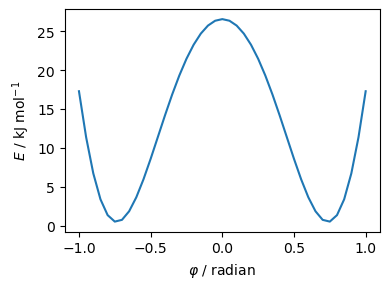

In [7]:
fig, ax = plt.subplots(figsize=(4, 3), layout="tight")

ax.plot(targets, opt_eners * units.mol / units.kJ)

ax.set_xlabel(r"$\varphi$ / radian")
ax.set_ylabel(r"$E$ / kJ mol$^{-1}$")

fig.show()

### Umbrella Sampling

In [8]:
os.mkdir("16_UmbrellaWindows")

In [9]:
# sequential simulation of umbrella windows
# for larger systems this is not effective,
# the strength of umbr sampl is the parallelization
for ii, target in enumerate(targets):
    # this is a list for the class to enable multidimensional PMFs
    # definition is the CV definition
    # as we do a minimization, there is no CV range, we want to set a minimum value
    # ext_sigma is the thermal coupling width,
    # which will translate into a force constant depending on the temperature
    cv_defs = [
        {
            "definition": info_dict,
            "range": [target, target],
            "ext_sigma": dval / 2,
            "type": "angle",
        }
    ]

    # set the calculator, which is the BiasBase class
    calculator = BiasBase.from_file("models/ammonia/", cv_defs=cv_defs, directed=True, device=device)
    atoms = AtomsBatch.from_atoms(opt_traj[ii])
    atoms.set_calculator(calculator)

    dyn = Langevin(
        atoms,
        timestep=0.5,
        temperature=300.0,
        friction_per_ps=1.0,
        maxwell_temp=300.0,
        logfile=f"16_UmbrellaWindows/window_{ii:02d}.log",
        trajectory=f"16_UmbrellaWindows/window_{ii:02d}.traj",
    )

    dyn.attach(
        BiasedNeuralMDLogger(dyn, atoms, f"16_UmbrellaWindows/window_{ii:02d}_ext.log", header=True, mode="w"),
        interval=4,
    )
    # For ammonia 1ps per window should be enough
    dyn.run(steps=2000)

THE RANDOM NUMBER SEED WAS: 113042989


100%|██████████| 100/100 [00:10<00:00,  9.56it/s]


THE RANDOM NUMBER SEED WAS: 2043811463


100%|██████████| 100/100 [00:12<00:00,  8.06it/s]


THE RANDOM NUMBER SEED WAS: 137513178


100%|██████████| 100/100 [00:11<00:00,  8.86it/s]


THE RANDOM NUMBER SEED WAS: 267110630


100%|██████████| 100/100 [00:10<00:00,  9.50it/s]


THE RANDOM NUMBER SEED WAS: 257540073


100%|██████████| 100/100 [00:11<00:00,  8.58it/s]


THE RANDOM NUMBER SEED WAS: 1355340552


100%|██████████| 100/100 [00:10<00:00,  9.47it/s]


THE RANDOM NUMBER SEED WAS: 1404002937


100%|██████████| 100/100 [00:10<00:00,  9.54it/s]


THE RANDOM NUMBER SEED WAS: 296106163


100%|██████████| 100/100 [00:10<00:00,  9.45it/s]


THE RANDOM NUMBER SEED WAS: 622816758


100%|██████████| 100/100 [00:10<00:00,  9.29it/s]


THE RANDOM NUMBER SEED WAS: 1209588813


100%|██████████| 100/100 [00:10<00:00,  9.28it/s]


THE RANDOM NUMBER SEED WAS: 767611337


100%|██████████| 100/100 [00:10<00:00,  9.21it/s]


THE RANDOM NUMBER SEED WAS: 2054799991


100%|██████████| 100/100 [00:10<00:00,  9.31it/s]


THE RANDOM NUMBER SEED WAS: 664755265


100%|██████████| 100/100 [00:10<00:00,  9.22it/s]


THE RANDOM NUMBER SEED WAS: 1042524983


100%|██████████| 100/100 [00:10<00:00,  9.19it/s]


THE RANDOM NUMBER SEED WAS: 1150109360


100%|██████████| 100/100 [00:10<00:00,  9.30it/s]


THE RANDOM NUMBER SEED WAS: 1211337040


100%|██████████| 100/100 [00:10<00:00,  9.49it/s]


THE RANDOM NUMBER SEED WAS: 345511792


100%|██████████| 100/100 [00:10<00:00,  9.48it/s]


THE RANDOM NUMBER SEED WAS: 1348582431


100%|██████████| 100/100 [00:10<00:00,  9.29it/s]


THE RANDOM NUMBER SEED WAS: 127668018


100%|██████████| 100/100 [00:10<00:00,  9.18it/s]


THE RANDOM NUMBER SEED WAS: 1025551563


100%|██████████| 100/100 [00:11<00:00,  9.02it/s]


THE RANDOM NUMBER SEED WAS: 1966512903


100%|██████████| 100/100 [00:10<00:00,  9.39it/s]


THE RANDOM NUMBER SEED WAS: 144394803


100%|██████████| 100/100 [00:10<00:00,  9.18it/s]


THE RANDOM NUMBER SEED WAS: 53301318


100%|██████████| 100/100 [00:10<00:00,  9.26it/s]


THE RANDOM NUMBER SEED WAS: 167092967


100%|██████████| 100/100 [00:10<00:00,  9.36it/s]


THE RANDOM NUMBER SEED WAS: 230700212


100%|██████████| 100/100 [00:10<00:00,  9.49it/s]


THE RANDOM NUMBER SEED WAS: 592337346


100%|██████████| 100/100 [00:11<00:00,  8.43it/s]


THE RANDOM NUMBER SEED WAS: 216251523


100%|██████████| 100/100 [00:12<00:00,  8.32it/s]


THE RANDOM NUMBER SEED WAS: 177126884


100%|██████████| 100/100 [00:11<00:00,  9.02it/s]


THE RANDOM NUMBER SEED WAS: 1995526186


100%|██████████| 100/100 [00:12<00:00,  8.08it/s]


THE RANDOM NUMBER SEED WAS: 1161543067


100%|██████████| 100/100 [00:10<00:00,  9.45it/s]


THE RANDOM NUMBER SEED WAS: 460074953


100%|██████████| 100/100 [00:10<00:00,  9.41it/s]


THE RANDOM NUMBER SEED WAS: 946721196


100%|██████████| 100/100 [00:10<00:00,  9.14it/s]


THE RANDOM NUMBER SEED WAS: 893561934


100%|██████████| 100/100 [00:10<00:00,  9.22it/s]


THE RANDOM NUMBER SEED WAS: 1829541212


100%|██████████| 100/100 [00:10<00:00,  9.25it/s]


THE RANDOM NUMBER SEED WAS: 1315087484


100%|██████████| 100/100 [00:10<00:00,  9.10it/s]


THE RANDOM NUMBER SEED WAS: 652481481


100%|██████████| 100/100 [00:11<00:00,  9.06it/s]


THE RANDOM NUMBER SEED WAS: 3619189


100%|██████████| 100/100 [00:11<00:00,  8.60it/s]


THE RANDOM NUMBER SEED WAS: 1404212356


100%|██████████| 100/100 [00:12<00:00,  7.82it/s]


THE RANDOM NUMBER SEED WAS: 311777114


100%|██████████| 100/100 [00:12<00:00,  7.83it/s]


THE RANDOM NUMBER SEED WAS: 553524710


100%|██████████| 100/100 [00:11<00:00,  8.76it/s]


THE RANDOM NUMBER SEED WAS: 1474238291


100%|██████████| 100/100 [00:10<00:00,  9.24it/s]


### Analysis of the data

In [10]:
# How to load the data
trajs = []
meta_f = np.zeros(shape=(len(targets), 3))
for ii in range(len(targets)):
    data = np.genfromtxt(f"16_UmbrellaWindows/window_{ii:02d}_ext.log", skip_header=1)
    trajs.append(data[:, 4])

# The targets can also be read from the log files
meta_f[:, 1] = targets
# since we used ext_sigma and not ext_k, we need to calculate the k
# k = (RT)/(sigma**2)
meta_f[:, 2] = (8.314 * 300.0 / 1000.0) / ((dval / 2) ** 2)

all_frames = trajs[0]
for traj in trajs[1:]:
    all_frames = np.concatenate((all_frames, traj))

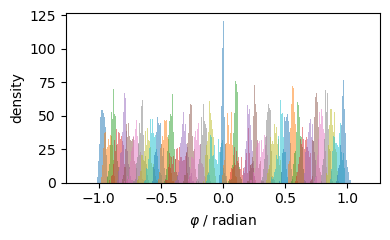

In [11]:
fig, ax = plt.subplots(figsize=(4, 2.5), layout="tight")

for traj, target in zip(trajs, targets):
    ax.hist(traj, alpha=0.5, bins=50, range=(target - 3 * dval, target + 3 * dval))

ax.set_xlabel(r"$\varphi$ / radian")
ax.set_ylabel(r"density")

fig.show()

In [12]:
# Get the unbiased weights with MBAR
W = mbar.run_mbar(traj_list=trajs, meta_f=meta_f, max_iter=int(1e6), conv=1.0e-6, outfreq=50, equil_temp=300.0)

Making Boltzmann factors

All ready!

Start of the self-consistent iteration.
Iter    1:	Conv=  0.9183356862	Conv_errvec=    170.766879
Iter   50:	Conv=  0.0327605081	Conv_errvec=     16.509416
Iter  100:	Conv=  0.0300629642	Conv_errvec=      9.949883
Iter  150:	Conv=  0.0223372041	Conv_errvec=      6.364216
Iter  200:	Conv=  0.0164014382	Conv_errvec=      4.384515
Iter  250:	Conv=  0.0120437215	Conv_errvec=      3.138257
Iter  300:	Conv=  0.0088464227	Conv_errvec=      2.282977
Iter  350:	Conv=  0.0064982921	Conv_errvec=      1.671512
Iter  400:	Conv=  0.0047731212	Conv_errvec=      1.226830
Iter  450:	Conv=  0.0035055072	Conv_errvec=      0.901258
Iter  500:	Conv=  0.0025741021	Conv_errvec=      0.662285
Iter  550:	Conv=  0.0018897674	Conv_errvec=      0.486716
Iter  600:	Conv=  0.0013869985	Conv_errvec=      0.357690
Iter  650:	Conv=  0.0010176537	Conv_errvec=      0.262862
Iter  700:	Conv=  0.0007463521	Conv_errvec=      0.193168
Iter  750:	Conv=  0.0005470920	Conv_errvec=      0.1

In [13]:
# grid for PMF, let's make it a bit finer than the window placements
minimum = all_frames.min()
maximum = all_frames.max()
bin_width = dval / 2
grid = np.arange(minimum, maximum, bin_width)

In [14]:
pmf, rho = mbar.pmf_from_weights(grid, all_frames, W, equil_temp=300.0)

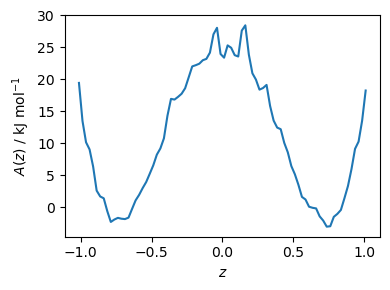

In [15]:
# even though these simulations are a bit of overkill,
# the PMF looks suprisingly poor
fig, ax = plt.subplots(figsize=(4, 3), layout="tight")

ax.plot(grid, pmf)

ax.set_xlabel(r"$z$")
ax.set_ylabel(r"$A(z)$ / kJ mol$^{-1}$")

fig.show()